In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import plotly.express as px

In [2]:
#getting the URL from hich data is to be extracted
url='https://understat.com/league/La_liga'

In [3]:
response=requests.get(url)

In [5]:
html_page=BeautifulSoup(response.text,'html.parser')
html_page

<!DOCTYPE html>

<html>
<head>
<base href="https://understat.com/"/>
<title>La liga xG Table and Scorers for the 2020/2021 season | Understat.com</title>
<meta charset="utf-8"/>
<meta content="xG table of La liga standings and top scorers for the 2020/2021 season, also tables from past seasons and other European football leagues." name="description"/>
<meta content="La liga, xg table,scorers, expected goals table, season 2020/2021" name="Keywords"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="manifest.json" rel="manifest"/>
<link color="#5bbad5" href="safari-pinned-tab.svg" rel="mask-icon"/>
<meta content="understat" name="apple-mobile-web-app-title"/>
<meta content="understat" name="application-name"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="no-cache" http-equiv="cache-contro

In [8]:
#finding player statistics from the page
html_page.find_all(name='script')

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var datesData 	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x2214136\x22,\x22isResult\x22\x3Atrue,\x22h\x22\x3A\x7B\x22id\x22\x3A\x22156\x22,\x22title\x22\x3A\x22Eibar\x22,\x22short_title\x22\x3A\x22EIB\x22\x7D,\x22a\x22\x3A\x7B\x22id\x22\x3A\x22152\x22,\x22title\x22\x3A\x22Celta\x20Vigo\x22,\x22short_title\x22\x3A\x22CEL\x22\x7D,\x22goals\x22\x3A\x7B\x22h\x22\x3A\x220\x22,\x22a\x22\x3A\x220\x22\x7D,\x22xG\x22\x3A\x7B\x22h\x22\x3A\x220.344008\x22,\x22a\x22\x3A\x220.783653\x22\x7D,\x22datetime\x22\x3A\x222020\x2D09\x2D12\x2014\x3A00\x3A00\x22,\x22forecast\x22\x3A\x7B\x22w\x22\x3A\x220.1401\x22,\x22d\x22\x3A\x220.3904\x22,\x22l\x22\x3A\x220.4695\x22\x7D\x7D,\x7B\x22id\x22\x3A\x2214137\x22,\x22isResult\x22\x3Atrue,\x22h\x22\x3A\x7B\x22id\x22\x3A\x22155\x22,\x22title\x22\x3A\x22Granada\x22,\x22short_title\x22\x3A\x22GRA\x22\x7D,\x22a\x22\x3A\x7B

In [9]:
html_page.find_all(name='script').__len__()

26

In [11]:
html_page.find_all(name='script')[3]

<script>
	var playersData	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x222097\x22,\x22player_name\x22\x3A\x22Lionel\x20Messi\x22,\x22games\x22\x3A\x2235\x22,\x22time\x22\x3A\x223017\x22,\x22goals\x22\x3A\x2230\x22,\x22xG\x22\x3A\x2226.676843278110027\x22,\x22assists\x22\x3A\x229\x22,\x22xA\x22\x3A\x2211.422847747802734\x22,\x22shots\x22\x3A\x22195\x22,\x22key_passes\x22\x3A\x2277\x22,\x22yellow_cards\x22\x3A\x224\x22,\x22red_cards\x22\x3A\x220\x22,\x22position\x22\x3A\x22F\x20M\x20S\x22,\x22team_title\x22\x3A\x22Barcelona\x22,\x22npg\x22\x3A\x2227\x22,\x22npxG\x22\x3A\x2222.96045546978712\x22,\x22xGChain\x22\x3A\x2237.906863175332546\x22,\x22xGBuildup\x22\x3A\x2220.33736250922084\x22\x7D,\x7B\x22id\x22\x3A\x222120\x22,\x22player_name\x22\x3A\x22Gerard\x20Moreno\x22,\x22games\x22\x3A\x2233\x22,\x22time\x22\x3A\x222680\x22,\x22goals\x22\x3A\x2223\x22,\x22xG\x22\x3A\x2219.52812883257866\x22,\x22assists\x22\x3A\x227\x22,\x22xA\x22\x3A\x227.810236442834139\x22,\x22shots\x22\x3A\x2298\x22,\x22key_p

In [19]:
i=html_page.findAll(name='script')[3]

In [23]:
d=str(i)

In [29]:
json_raw_string=d[40:-13]

In [30]:
# JSON raw string containing player data
json_raw_string

'\\x5B\\x7B\\x22id\\x22\\x3A\\x222097\\x22,\\x22player_name\\x22\\x3A\\x22Lionel\\x20Messi\\x22,\\x22games\\x22\\x3A\\x2235\\x22,\\x22time\\x22\\x3A\\x223017\\x22,\\x22goals\\x22\\x3A\\x2230\\x22,\\x22xG\\x22\\x3A\\x2226.676843278110027\\x22,\\x22assists\\x22\\x3A\\x229\\x22,\\x22xA\\x22\\x3A\\x2211.422847747802734\\x22,\\x22shots\\x22\\x3A\\x22195\\x22,\\x22key_passes\\x22\\x3A\\x2277\\x22,\\x22yellow_cards\\x22\\x3A\\x224\\x22,\\x22red_cards\\x22\\x3A\\x220\\x22,\\x22position\\x22\\x3A\\x22F\\x20M\\x20S\\x22,\\x22team_title\\x22\\x3A\\x22Barcelona\\x22,\\x22npg\\x22\\x3A\\x2227\\x22,\\x22npxG\\x22\\x3A\\x2222.96045546978712\\x22,\\x22xGChain\\x22\\x3A\\x2237.906863175332546\\x22,\\x22xGBuildup\\x22\\x3A\\x2220.33736250922084\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x222120\\x22,\\x22player_name\\x22\\x3A\\x22Gerard\\x20Moreno\\x22,\\x22games\\x22\\x3A\\x2233\\x22,\\x22time\\x22\\x3A\\x222680\\x22,\\x22goals\\x22\\x3A\\x2223\\x22,\\x22xG\\x22\\x3A\\x2219.52812883257866\\x22,\\x22assists\\x22

In [31]:
json_data=json_raw_string

In [32]:
# Decoding JSON data
json_data=json_data.encode('utf8').decode('unicode_escape')

In [33]:
json_data

'[{"id":"2097","player_name":"Lionel Messi","games":"35","time":"3017","goals":"30","xG":"26.676843278110027","assists":"9","xA":"11.422847747802734","shots":"195","key_passes":"77","yellow_cards":"4","red_cards":"0","position":"F M S","team_title":"Barcelona","npg":"27","npxG":"22.96045546978712","xGChain":"37.906863175332546","xGBuildup":"20.33736250922084"},{"id":"2120","player_name":"Gerard Moreno","games":"33","time":"2680","goals":"23","xG":"19.52812883257866","assists":"7","xA":"7.810236442834139","shots":"98","key_passes":"43","yellow_cards":"3","red_cards":"0","position":"F M S","team_title":"Villarreal","npg":"13","npxG":"12.095480419695377","xGChain":"23.26353019475937","xGBuildup":"6.951297817751765"},{"id":"2370","player_name":"Karim Benzema","games":"34","time":"2914","goals":"23","xG":"19.454521590843797","assists":"9","xA":"6.755567729473114","shots":"123","key_passes":"38","yellow_cards":"2","red_cards":"0","position":"F S","team_title":"Real Madrid","npg":"22","npxG":

In [36]:
json.loads(json_data)

[{'id': '2097',
  'player_name': 'Lionel Messi',
  'games': '35',
  'time': '3017',
  'goals': '30',
  'xG': '26.676843278110027',
  'assists': '9',
  'xA': '11.422847747802734',
  'shots': '195',
  'key_passes': '77',
  'yellow_cards': '4',
  'red_cards': '0',
  'position': 'F M S',
  'team_title': 'Barcelona',
  'npg': '27',
  'npxG': '22.96045546978712',
  'xGChain': '37.906863175332546',
  'xGBuildup': '20.33736250922084'},
 {'id': '2120',
  'player_name': 'Gerard Moreno',
  'games': '33',
  'time': '2680',
  'goals': '23',
  'xG': '19.52812883257866',
  'assists': '7',
  'xA': '7.810236442834139',
  'shots': '98',
  'key_passes': '43',
  'yellow_cards': '3',
  'red_cards': '0',
  'position': 'F M S',
  'team_title': 'Villarreal',
  'npg': '13',
  'npxG': '12.095480419695377',
  'xGChain': '23.26353019475937',
  'xGBuildup': '6.951297817751765'},
 {'id': '2370',
  'player_name': 'Karim Benzema',
  'games': '34',
  'time': '2914',
  'goals': '23',
  'xG': '19.454521590843797',
  'as

In [37]:
json.loads(json_data).__len__()

570

In [87]:
#Converting final data into pandas Dataframe
df=pd.DataFrame(json.loads(json_data))

In [88]:
data=df

In [89]:
df.head()

id        player_name games  time goals                  xG assists  \
0  2097       Lionel Messi    35  3017    30  26.676843278110027       9   
1  2120      Gerard Moreno    33  2680    23   19.52812883257866       7   
2  2370      Karim Benzema    34  2914    23  19.454521590843797       9   
3  2098        Luis Suárez    32  2541    21   17.89246611110866       3   
4  5169  Youssef En-Nesyri    38  2308    18   15.79480616375804       0   

                   xA shots key_passes yellow_cards red_cards position  \
0  11.422847747802734   195         77            4         0    F M S   
1   7.810236442834139    98         43            3         0    F M S   
2   6.755567729473114   123         38            2         0      F S   
3  3.1426702942699194   104         27            6         0      F S   
4  2.6420645620673895    77         13            2         0      F S   

        team_title npg                npxG             xGChain  \
0        Barcelona  27   22.96045546978712  37.906863175332546   
1       Villarreal  13  12.095480419695377   23.26353019475937   
2      Real Madrid  22  18.711243921890855  28.303930163383484   
3  Atletico Madrid  18  15.662633268162608  18.595971453934908   
4          Sevilla  18   15.79480616375804   17.81611675210297   

            xGBuildup  
0   20.33736250922084  
1   6.951297817751765  
2   6.194142518565059  
3  1.2328046094626188  
4   1.087053531780839

In [90]:
df.columns

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

Definitions-
1. xG- Expected goals (xG) measures the quality of a shot based on several variables such as assist type, shot angle and distance from goal, whether it was a headed shot and whether it was defined as a big chance.

2. xA- Expected assists (xA) measures the likelihood that a given pass will become a goal assist. It considers several factors including the type of pass, pass end-point and length of pass.Adding up a player or team's expected assists gives us an indication of how many assists a player of team should have had based on their build up and attacking play.

3. Key passes-Opta defines a key pass as “the final pass or pass-cum-shot leading to the recipient of the ball having an attempt at goal without scoring.”

4. npg- Non-penalty Goals

5. npxG- Non-penalty Expected goals,Total expected goals minus expected goals from penalties.

6. xG chain-xG Chain is the total xG of every possession the player is involved in. xG build up is the same minus shots and key passes.

7. xG buildup- xGBuildup measures all attacking actions of the player (except for key passes and shots on goal)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            570 non-null    object
 1   player_name   570 non-null    object
 2   games         570 non-null    object
 3   time          570 non-null    object
 4   goals         570 non-null    object
 5   xG            570 non-null    object
 6   assists       570 non-null    object
 7   xA            570 non-null    object
 8   shots         570 non-null    object
 9   key_passes    570 non-null    object
 10  yellow_cards  570 non-null    object
 11  red_cards     570 non-null    object
 12  position      570 non-null    object
 13  team_title    570 non-null    object
 14  npg           570 non-null    object
 15  npxG          570 non-null    object
 16  xGChain       570 non-null    object
 17  xGBuildup     570 non-null    object
dtypes: object(18)
memory usage: 80.3+ KB


Since all the columns are in string format  we have to convert it into required data types 

In [99]:
#converting sting columns into required data types
df['id']=df['id'].map(int)
df['games']=df['games'].map(int)
df['time']=df['time'].map(int)
df['goals']=df['goals'].map(int)
df['xG']=df['xG'].map(float)
df['assists']=df['assists'].map(int)
df['xA']=df['xA'].map(float)
df['shots']=df['shots'].map(int)
df['key_passes']=df['key_passes'].map(int)
df['yellow_cards']=df['yellow_cards'].map(int)
df['red_cards']=df['red_cards'].map(int)
df['npg']=df['npg'].map(int)
df['npxG']=df['npxG'].map(float)
df['xGChain']=df['xGChain'].map(float)
df['xGBuildup']=df['xGBuildup'].map(float)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            570 non-null    int64  
 1   player_name   570 non-null    object 
 2   games         570 non-null    int64  
 3   time          570 non-null    int64  
 4   goals         570 non-null    int64  
 5   xG            570 non-null    float64
 6   assists       570 non-null    int64  
 7   xA            570 non-null    float64
 8   shots         570 non-null    int64  
 9   key_passes    570 non-null    int64  
 10  yellow_cards  570 non-null    int64  
 11  red_cards     570 non-null    int64  
 12  position      570 non-null    object 
 13  team_title    570 non-null    object 
 14  npg           570 non-null    int64  
 15  npxG          570 non-null    float64
 16  xGChain       570 non-null    float64
 17  xGBuildup     570 non-null    float64
dtypes: float64(5), int64(10), obje

In [101]:
# It sdould be noted that there aren't any null values
df.describe(include='all')

id player_name       games         time       goals  \
count    570.000000         570  570.000000   570.000000  570.000000   
unique          NaN         565         NaN          NaN         NaN   
top             NaN       Nacho         NaN          NaN         NaN   
freq            NaN           2         NaN          NaN         NaN   
mean    5205.657895         NaN   20.363158  1317.491228    1.617544   
std     2830.585779         NaN   11.597211   975.124626    3.226817   
min       47.000000         NaN    1.000000     1.000000    0.000000   
25%     2321.500000         NaN   10.250000   429.250000    0.000000   
50%     5140.500000         NaN   22.000000  1206.500000    0.000000   
75%     7902.250000         NaN   31.000000  2147.250000    2.000000   
max     9534.000000         NaN   38.000000  3420.000000   30.000000   

                xG     assists          xA       shots  key_passes  \
count   570.000000  570.000000  570.000000  570.000000  570.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      1.695816    1.108772    1.157250   14.212281   10.475439   
std       2.904992    1.878215    1.646572   19.170006   13.062117   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.077012    0.000000    0.047523    1.250000    1.000000   
50%       0.684115    0.000000    0.547618    8.000000    6.000000   
75%       1.938257    2.000000    1.566398   19.000000   15.000000   
max      26.676843   13.000000   11.422848  195.000000   77.000000   

        yellow_cards   red_cards position team_title         npg        npxG  \
count     570.000000  570.000000      570        570  570.000000  570.000000   
unique           NaN         NaN       14         31         NaN         NaN   
top              NaN         NaN      D S    Granada         NaN         NaN   
freq             NaN         NaN      121         33         NaN         NaN   
mean        2.829825    0.122807      NaN        NaN    1.433333    1.511959   
std         2.786641    0.354245      NaN        NaN    2.840817    2.501392   
min         0.000000    0.000000      NaN        NaN    0.000000    0.000000   
25%         1.000000    0.000000      NaN        NaN    0.000000    0.075837   
50%         2.000000    0.000000      NaN        NaN    0.000000    0.626334   
75%         4.000000    0.000000      NaN        NaN    2.000000    1.845572   
max        13.000000    2.000000      NaN        NaN   27.000000   22.960455   

           xGChain   xGBuildup  
count   570.000000  570.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean      4.651316    2.877835  
std       5.154688    3.385497  
min       0.000000    0.000000  
25%       0.899421    0.555265  
50%       3.011366    1.860814  
75%       6.615154    4.229805  
max      37.906863   23.308999

In [115]:
#removing unnecessary columns
df.drop('id',axis=1,inplace=True)

In [241]:
# Removing players who have played less than 90 minutes, since they can be seen as outliers
df=df[df['time']>90]

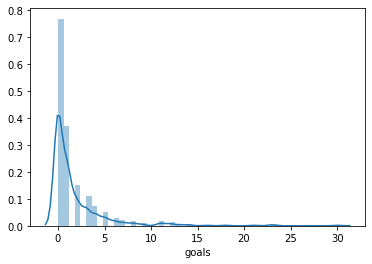

In [271]:
#Figure showing distributin of goals among the players in the league
fig,ax=plt.subplots()
sns.distplot(df['goals'])
plt.show()

In [246]:
#total number of goals scored in the league campaign
df['goals'].sum()

922

In [247]:
# Here, I am sorting players by goals scored, assists, keypasses, and xG so that we can create visualization 
df1=df.sort_values(by='goals',ascending=False).head(10)

In [249]:
df2=df.sort_values(by='assists',ascending=False).head(10)
df3=df.sort_values(by='key_passes',ascending=False).head(10)
df4=df.sort_values(by='shots',ascending=False).head(10)
df5=df.sort_values(by='xG',ascending=False).head(10)

### Naturally, a player who has played the most  minutes in the league will have more contribution to the attack, hence in order to level the playing field for those who have played less minutes, we create per 90 stats, which provides average statistics of a player in a match.

# Creating Per90 stats
1. G90-goals scored per 90 minutes played or( average goals scored in a match)
2. A90- Assists per 90 mintues played or( average assists in a match)
3. xG90- xG per 90 mintues played or( average xG in a match)
4. K90 - keypasses per 90 mintues played or( average keypasses made in a match)
5. npxG90-  Non penalty goals scored per 90 minutes played or( average  non- penalty goals scored in a match)
6. xGChain90-  xGChain involvement per 90 minutes played or( average xGChain in a match)
7. xGBuildup90- xGBuildup involvement per 90 minutes played or( average xGBuildup in a match)

In [382]:
df['G90']=(df['goals']*90)/df['time']
df['A90']=(df['assists']*90)/df['time']
df['xG90']=(df['xG']*90)/df['time']
df['K90']=(df['key_passes']*90)/df['time']
df['npxG90']=(df['npxG']*90)/df['time']
df['xGChain90']=(df['xGChain']*90)/df['time']
df['xGBuildup90']=(df['xGBuildup']*90)/df['time']

<ipython-input-382-b6709a21f582>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-382-b6709a21f582>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-382-b6709a21f582>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-382-b67

In [383]:
df.head(5)

player_name  games  time  goals         xG  assists         xA  \
0       Lionel Messi     35  3017     30  26.676843        9  11.422848   
1      Gerard Moreno     33  2680     23  19.528129        7   7.810236   
2      Karim Benzema     34  2914     23  19.454522        9   6.755568   
3        Luis Suárez     32  2541     21  17.892466        3   3.142670   
4  Youssef En-Nesyri     38  2308     18  15.794806        0   2.642065   

   shots  key_passes  yellow_cards  ...       A90      xG90       K90  \
0    195          77             4  ...  0.268479  0.795796  2.296984   
1     98          43             3  ...  0.235075  0.655795  1.444030   
2    123          38             2  ...  0.277968  0.600860  1.173644   
3    104          27             6  ...  0.106257  0.633736  0.956316   
4     77          13             2  ...  0.000000  0.615915  0.506932   

     npxG90  xGChain90  xGBuildup90  goal_involvement      GI90  \
0  0.684932   1.130798     0.606683                39  1.163407   
1  0.406192   0.781238     0.233439                30  1.007463   
2  0.577904   0.874178     0.191308                32  0.988332   
3  0.554757   0.658653     0.043665                24  0.850059   
4  0.615915   0.694736     0.042389                18  0.701906   

   chance_creation  goal_to_shot  
0               86      0.153846  
1               50      0.234694  
2               47      0.186992  
3               30      0.201923  
4               13      0.233766  

[5 rows x 28 columns]

In [384]:
df.describe(include='all')

player_name       games         time       goals          xG  \
count           503  503.000000   503.000000  503.000000  503.000000   
unique          499         NaN          NaN         NaN         NaN   
top     Luis Suárez         NaN          NaN         NaN         NaN   
freq              2         NaN          NaN         NaN         NaN   
mean            NaN   22.821074  1487.761431    1.833002    1.915275   
std             NaN   10.036179   911.333414    3.377324    3.025085   
min             NaN    2.000000    93.000000    0.000000    0.000000   
25%             NaN   15.000000   703.500000    0.000000    0.180887   
50%             NaN   24.000000  1396.000000    1.000000    0.830576   
75%             NaN   31.000000  2255.000000    2.000000    2.187167   
max             NaN   38.000000  3420.000000   30.000000   26.676843   

           assists          xA       shots  key_passes  yellow_cards  ...  \
count   503.000000  503.000000  503.000000  503.000000    503.000000  ...   
unique         NaN         NaN         NaN         NaN           NaN  ...   
top            NaN         NaN         NaN         NaN           NaN  ...   
freq           NaN         NaN         NaN         NaN           NaN  ...   
mean      1.254473    1.308574   16.049702   11.827038      3.188867  ...   
std       1.953354    1.696292   19.689105   13.332400      2.771891  ...   
min       0.000000    0.000000    0.000000    0.000000      0.000000  ...   
25%       0.000000    0.136333    3.000000    2.000000      1.000000  ...   
50%       0.000000    0.679815   10.000000    7.000000      3.000000  ...   
75%       2.000000    1.835359   23.000000   16.500000      5.000000  ...   
max      13.000000   11.422848  195.000000   77.000000     13.000000  ...   

               A90        xG90         K90      npxG90   xGChain90  \
count   503.000000  503.000000  503.000000  503.000000  503.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.072963    0.114984    0.730011    0.104103    0.315730   
std       0.110834    0.140535    0.587931    0.124506    0.210513   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.018133    0.230967    0.018066    0.154208   
50%       0.000000    0.060947    0.652174    0.058608    0.277413   
75%       0.114763    0.161754    1.124772    0.148792    0.423798   
max       0.989011    0.795796    2.807183    0.684932    1.130798   

        xGBuildup90  goal_involvement        GI90  chance_creation  \
count    503.000000        503.000000  503.000000       503.000000   
unique          NaN               NaN         NaN              NaN   
top             NaN               NaN         NaN              NaN   
freq            NaN               NaN         NaN              NaN   
mean       0.191785          3.087475    0.176808        13.081511   
std        0.150526          4.686199    0.210949        14.936496   
min        0.000000          0.000000    0.000000         0.000000   
25%        0.086975          0.000000    0.000000         3.000000   
50%        0.152428          1.000000    0.100727         8.000000   
75%        0.259346          4.000000    0.269371        18.000000   
max        0.891477         39.000000    1.163407        86.000000   

        goal_to_shot  
count     447.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.094690  
std         0.124361  
min         0.000000  
25%         0.000000  
50%         0.066667  
75%         0.133333  
max         1.000000  

[11 rows x 28 columns]

In [258]:
#Sorting players on the basis on per90 stats
dfx1=df.sort_values(by='G90',ascending=False).head(10)
dfx2=df.sort_values(by='A90',ascending=False).head(10)
dfx3=df.sort_values(by='K90',ascending=False).head(10)
dfx4=df.sort_values(by='xG90',ascending=False).head(10)

# Top Goal-scorers in the league

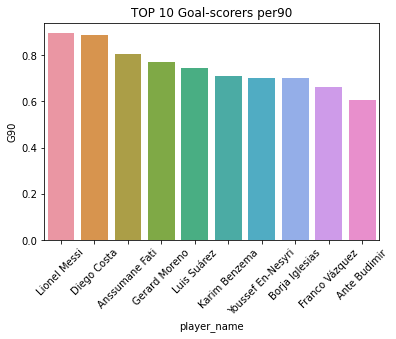

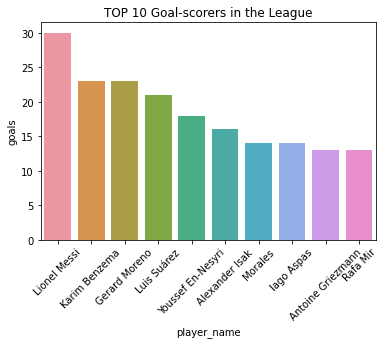

In [412]:
a=sns.barplot(x=dfx1['player_name'],y=dfx1['G90'])
plt.xticks(rotation=45)
a.set_title('TOP 10 Goal-scorers per90')
plt.show()
b=sns.barplot(y=df1['goals'], x=df1['player_name'],data=df1)
plt.xticks(rotation=45)
b.set_title('TOP 10 Goal-scorers in the League')
plt.show()

# Top 10 assist providers

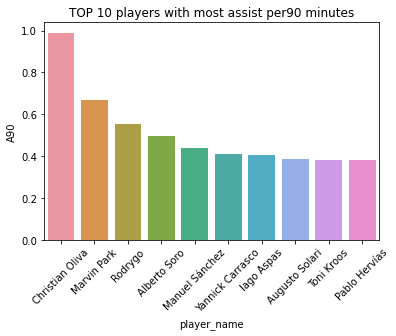

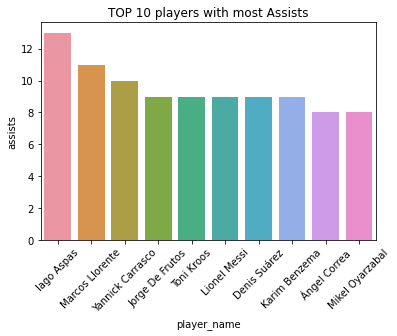

In [415]:
a=sns.barplot(x=dfx2['player_name'],y=dfx2['A90'])
plt.xticks(rotation=45)
a.set_title('TOP 10 players with most assist per90 minutes')
plt.show()
b=sns.barplot(y=df2['assists'], x=df2['player_name'],)
plt.xticks(rotation=45)
b.set_title('TOP 10 players with most Assists')
plt.show()

# Top 10 players with most Keypasses

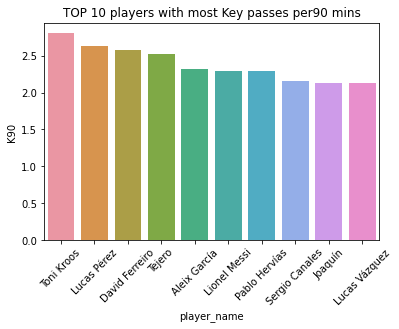

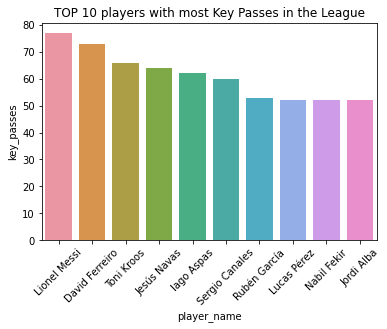

In [418]:
a=sns.barplot(x=dfx3['player_name'],y=dfx3['K90'],)
plt.xticks(rotation=45)
a.set_title('TOP 10 players with most Key passes per90 mins')
plt.show()
b=sns.barplot(y=df3['key_passes'], x=df3['player_name'])
plt.xticks(rotation=45)
sns.color_palette("jet_r")
b.set_title('TOP 10 players with most Key Passes in the League')
plt.show()

# Finding the best striker in the league

In [419]:
# To find the best attacker, we need to add the goals and the assists by the player, or how much a player involves when a team scores a goal
df['goal_involvement']=df['goals']+df['assists']
df['GI90']=df['goal_involvement']*90/df['time']
df

<ipython-input-419-a0b2b9a4b0ab>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-419-a0b2b9a4b0ab>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



player_name  games  time  goals         xG  assists         xA  \
0           Lionel Messi     35  3017     30  26.676843        9  11.422848   
1          Gerard Moreno     33  2680     23  19.528129        7   7.810236   
2          Karim Benzema     34  2914     23  19.454522        9   6.755568   
3            Luis Suárez     32  2541     21  17.892466        3   3.142670   
4      Youssef En-Nesyri     38  2308     18  15.794806        0   2.642065   
..                   ...    ...   ...    ...        ...      ...        ...   
562                Ferro      3   181      0   0.000000        0   0.000000   
563  Helibelton Palacios     11   738      0   0.000000        0   0.085081   
564          Álex Martín      2    93      0   0.000000        0   0.000000   
566    Alejandro Cantero      4   245      0   0.442344        0   1.082567   
567     Carlos Domínguez      4   360      0   0.067550        0   0.034894   

     shots  key_passes  yellow_cards  ...       A90      xG90       K90  \
0      195          77             4  ...  0.271462  1.000000  0.818252   
1       98          43             3  ...  0.237687  0.824075  0.514405   
2      123          38             2  ...  0.281057  0.755043  0.418086   
3      104          27             6  ...  0.107438  0.796354  0.340668   
4       77          13             2  ...  0.000000  0.773962  0.180584   
..     ...         ...           ...  ...       ...       ...       ...   
562      0           0             0  ...  0.000000  0.000000  0.000000   
563      0           3             0  ...  0.000000  0.000000  0.130328   
564      0           0             0  ...  0.000000  0.000000  0.000000   
566      3           3             1  ...  0.000000  0.204190  0.392579   
567      1           1             2  ...  0.000000  0.021221  0.089057   

       npxG90  xGChain90  xGBuildup90  goal_involvement      GI90  \
0    0.684932   1.000000     0.680537                39  1.163407   
1    0.406192   0.690873     0.261857                30  1.007463   
2    0.577904   0.773063     0.214597                32  0.988332   
3    0.554757   0.582467     0.048980                24  0.850059   
4    0.615915   0.614377     0.047550                18  0.701906   
..        ...        ...          ...               ...       ...   
562  0.000000   0.000000     0.000000                 0  0.000000   
563  0.000000   0.222028     0.269994                 0  0.000000   
564  0.000000   0.000000     0.000000                 0  0.000000   
566  0.162494   0.459841     0.134444                 0  0.000000   
567  0.016887   0.054893     0.069629                 0  0.000000   

     chance_creation  goal_to_shot  
0                 86      0.153846  
1                 50      0.234694  
2                 47      0.186992  
3                 30      0.201923  
4                 13      0.233766  
..               ...           ...  
562                0           NaN  
563                3           NaN  
564                0           NaN  
566                3      0.000000  
567                1      0.000000  

[503 rows x 28 columns]

In [292]:
df6=df.sort_values(by='goal_involvement',ascending=False).head(10)
df6

player_name  games  time  goals         xG  assists         xA  \
0        Lionel Messi     35  3017     30  26.676843        9  11.422848   
2       Karim Benzema     34  2914     23  19.454522        9   6.755568   
1       Gerard Moreno     33  2680     23  19.528129        7   7.810236   
7          Iago Aspas     33  2878     14  12.255060       13   9.306388   
3         Luis Suárez     32  2541     21  17.892466        3   3.142670   
11    Marcos Llorente     37  2960     12   4.768966       11   6.388480   
8   Antoine Griezmann     36  2646     13  12.428818        7   6.660381   
17       Carlos Soler     32  2745     11   9.409325        8   5.281804   
16    Mikel Oyarzabal     33  2442     11  10.841891        8   7.359040   
4   Youssef En-Nesyri     38  2308     18  15.794806        0   2.642065   

    shots  key_passes  yellow_cards  ...  xGBuildup       G90       A90  \
0     195          77             4  ...  20.337363  0.894929  0.268479   
2     123          38             2  ...   6.194143  0.710364  0.277968   
1      98          43             3  ...   6.951298  0.772388  0.235075   
7      51          62             9  ...  11.444090  0.437804  0.406532   
3     104          27             6  ...   1.232805  0.743802  0.106257   
11     49          44             6  ...  10.456970  0.364865  0.334459   
8      71          42             4  ...  12.167519  0.442177  0.238095   
17     37          45             7  ...   5.717745  0.360656  0.262295   
16     62          51             1  ...   9.977227  0.405405  0.294840   
4      77          13             2  ...   1.087054  0.701906  0.000000   

        xG90       K90    npxG90  xGChain90  xGBuildup90  goal_involvement  \
0   0.795796  2.296984  0.684932   1.130798     0.606683                39   
2   0.600860  1.173644  0.577904   0.874178     0.191308                32   
1   0.655795  1.444030  0.406192   0.781238     0.233439                30   
7   0.383237  1.938846  0.267031   0.793023     0.357876                27   
3   0.633736  0.956316  0.554757   0.658653     0.043665                24   
11  0.145002  1.337838  0.145002   0.591380     0.317948                23   
8   0.422749  1.428571  0.372190   0.840898     0.413861                20   
17  0.308502  1.475410  0.089183   0.319520     0.187467                19   
16  0.399578  1.879607  0.207828   0.689750     0.367711                19   
4   0.615915  0.506932  0.615915   0.694736     0.042389                18   

        GI90  
0   1.163407  
2   0.988332  
1   1.007463  
7   0.844336  
3   0.850059  
11  0.699324  
8   0.680272  
17  0.622951  
16  0.700246  
4   0.701906  

[10 rows x 26 columns]

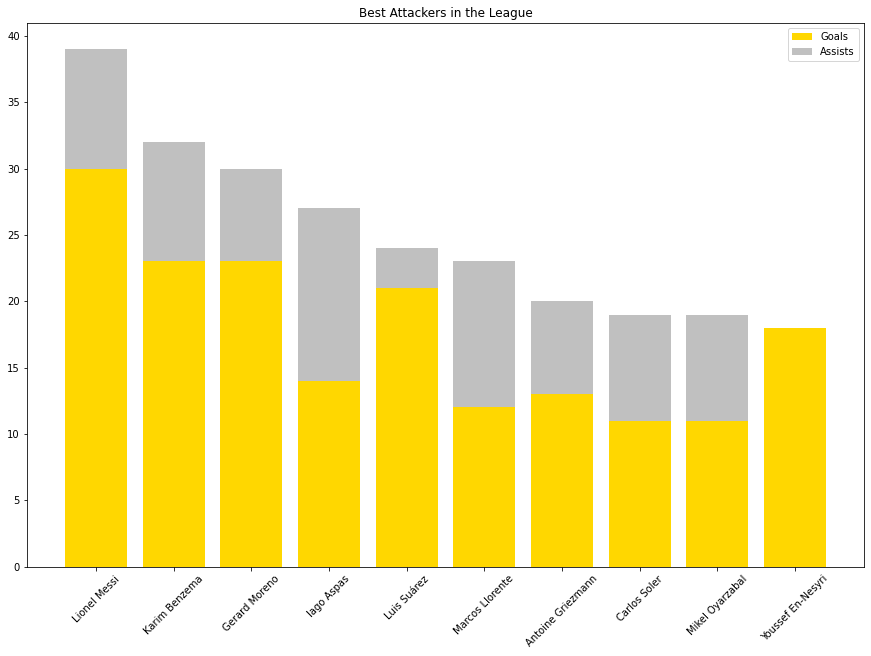

In [420]:
fig,ax=plt.subplots(figsize=[15,10])
ax.bar(df6['player_name'],df6["goals"],label="Goals",color='gold')
ax.bar(df6['player_name'],df6["assists"],bottom=df6["goals"],label="Assists",color='silver')
plt.xticks(rotation=45)
ax.set_title('Best Attackers in the League')
ax.legend()
plt.show()

# Finding the best playmaker in the league

In [421]:
# For finding the best playmaker, we can use the how much the player provides assists or provides Keypasses to the team  
df['chance_creation']=df['assists']+df['key_passes']
df7=df.sort_values(by='chance_creation',ascending=False).head(15)

<ipython-input-421-bb4a54a45513>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



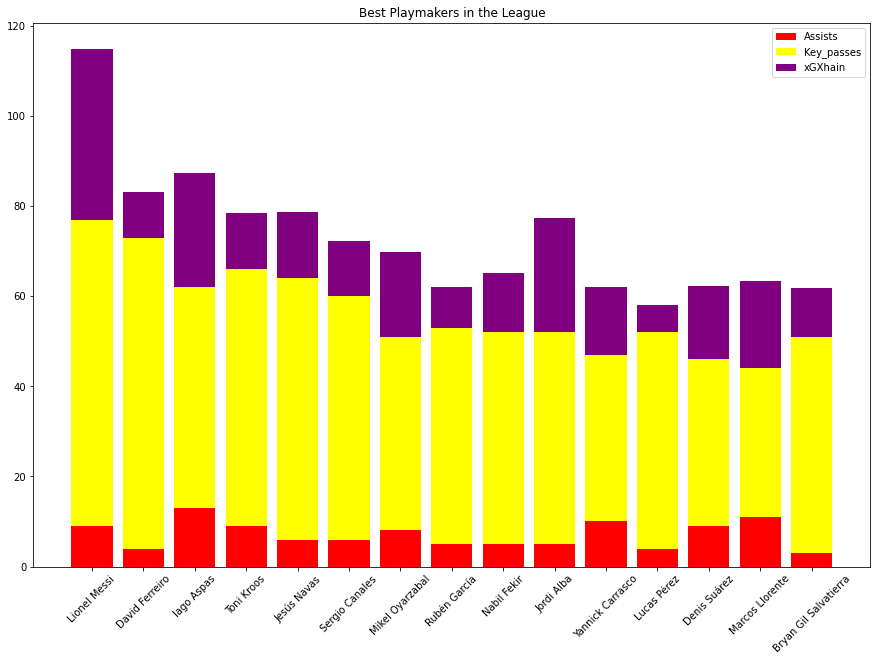

In [424]:
# We will also measure the xG chain , which provides hpw much the player is involved in a team goal
fig,ax=plt.subplots(figsize=[15,10])
ax.bar(df7['player_name'],df7["assists"],label="Assists",color='red')
ax.bar(df7['player_name'],df7["key_passes"],bottom=df7["assists"],label="Key_passes",color='yellow')
ax.bar(df7['player_name'],df7["xGChain"],bottom=df7["key_passes"],label="xGXhain",color='purple')
plt.xticks(rotation=45)
ax.legend()
ax.set_title('Best Playmakers in the League')
plt.show()

# Creating Radar Plots

### We can easily compare all the values of a particular player from a Radarplot

In [385]:
per90=['G90','A90','K90','xG90','xGChain90','xGBuildup90']

In [392]:
df.loc[[0],['G90','A90','K90','xG90','xGChain90','xGBuildup90']].sum()

G90            0.894929
A90            0.268479
K90            2.296984
xG90           0.795796
xGChain90      1.130798
xGBuildup90    0.606683
dtype: float64

In [393]:
fig=px.line_polar(df,r=df.loc[[0],per90].sum(),theta=per90,line_close=True)
fig.update_traces(fill='toself')
fig.show()

# Normalization of Values

Here we can see that K90 values is much bigger than other values, which makes analysing prone to error, hence we use Normalize the value or scale value based on other values

In [404]:
# Here I am using sklearn library for noramlising the value
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df7[per90]=scaler.fit_transform(df7[per90])

In [396]:
df[per90]

G90       A90       K90      xG90  xGChain90  xGBuildup90
0    1.000000  0.271462  0.818252  1.000000   1.000000     0.680537
1    0.863072  0.237687  0.514405  0.824075   0.690873     0.261857
2    0.793766  0.281057  0.418086  0.755043   0.773063     0.214597
3    0.831129  0.107438  0.340668  0.796354   0.582467     0.048980
4    0.784315  0.000000  0.180584  0.773962   0.614377     0.047550
..        ...       ...       ...       ...        ...          ...
562  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000
563  0.000000  0.000000  0.130328  0.000000   0.222028     0.269994
564  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000
566  0.000000  0.000000  0.392579  0.204190   0.459841     0.134444
567  0.000000  0.000000  0.089057  0.021221   0.054893     0.069629

[503 rows x 6 columns]

In [426]:
# Now, the radar plot looks much easier to read and analyse, but it should be noted that these are not the actual values.
fig=px.line_polar(df,r=df.loc[[0],per90].sum(),theta=per90,line_close=True)
fig.update_traces(fill='toself')
fig.show()

# Comparing the per90 stats of top 10 goal-scorers

In [400]:
for i,row in df6.iterrows():
    fig=px.line_polar(df6,r=df6.loc[[i],per90].sum(),theta=per90,line_close=True,title=row['player_name'])
    fig.update_traces(fill='toself')
    fig.show()

# Comparing the best playmakers in the league based on per90 stats

In [427]:
for i,row in df7.iterrows():
    fig=px.line_polar(df7,r=df7.loc[[i],per90].sum(),theta=per90,line_close=True,title=row['player_name'])
    fig.update_traces(fill='toself')
    fig.show()